# R: Word Cloud Case Study

By Jacky Poon, originally published in Actuaries Digital as [Analytics Snippet: In the Library](https://www.actuaries.digital/2018/06/14/analytics-snippet-in-the-library/).

## Libraries and Packages

In R, we will be using: 
 * plotly for the pie charts, 
 * dplyr for data manipulation, 
 * tm for text mining, 
 * wordcloud for word clouds, 
 * and RColorBrewer for a touch of colour.

In [1]:
library("plotly")
library("dplyr")
library("tm")
library("wordcloud")
library("RColorBrewer")

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer



If you do not have these packages installed previously, you will need to run install.packages to install them (e.g.``install.packages("plotly")``)

## Reading the Data

Let's download the data from the [Brisbane City Open Data Portal] (https://www.data.brisbane.qld.gov.au/data/dataset/library-checkouts-branch-date) which is publicly available under [Creative Commons Attribution 4.0] (https://creativecommons.org/licenses/by/4.0/):

In [2]:
temp <- tempfile()
download.file("https://www.data.brisbane.qld.gov.au/data/dataset/53d02339-1818-43df-9845-83808e5e247e/resource/ed431a68-15f2-430e-b140-4c603597680a/download/library-checkouts-all-branches-december-2017.csv.zip", temp, mode="wb")

data <- read.csv(unz(temp, "Library Checkouts all Branches December 2017.csv")) 

Inspecting the data, we have title, author, item type, age, and the library branch it was checked out from, as well as various IDs:

In [3]:
data

Title                                                                                                                                                                                                   
1     Ashes to ashes / Jenny Han & Siobhan Vivian                                                                                                                                                             
2     Silicon chip                                                                                                                                                                                            
3     Nepal / written and researched by Bradley Mayhew, Lindsay Brown, Trent Holden                                                                                                                           
4     Trekking in the Nepal Himalaya / written and researched by Bradley Mayhew, Lindsay Brown, Stuart Butler                                                                                                 
5     The destroyers / Christopher Bollen                                                                                                                                                                     
6     The lonely city : adventures in the art of being alone / Olivia Laing                                                                                                                                   
7     Too many elephants in this house / Ursula Dubosarsky ; pictures by Andrew Joyner                                                                                                                        
8     Lost cities of the ancients [dvd]                                                                                                                                                                       
9     Blind faith / Rebecca Zanetti                                                                                                                                                                           
10    Divided / Sharon M. Johnston                                                                                                                                                                            
11    Battlestorm / Susan Krinard                                                                                                                                                                             
12    Blind date / Bella Jewel                                                                                                                                                                                
13    Mist / Susan Krinard                                                                                                                                                                                    
14    Black ice / Susan Krinard                                                                                                                                                                               
15    Islands : a New Zealand journey / [written by] Bruce Ansley and [illustrated by] Jane Ussher                                                                                                            
16    Great southern land / Ivan O'Mahoney & Steve Bibb                                                                                                                                                       
17    What a wonderful life : with positive psychology / Sarah Zobel Koelpin ; translated by Hans Wrang and Martin Aitken                                                                                     
18    The everyday entrepreneur : apply the triple threat of amibition, confidence, and conviction for success on your own terms / Rob Basso with Adina Genn                                                  
19    Employee to entrepreneur : how to ditch the day job and start your 

There is a language column, but it has many blanks and ``UNKNOWN`` values so that does not appear to be very useful.

## What sort of items are being checked out?

In [4]:
plot_ly(width=900, height=450) %>% 
  add_pie(data=count(data, Age), labels = ~Age, values= ~n, 
          type = 'pie', textinfo = 'label+percent', domain = list(x = c(0.6, 1), y = c(0, 1))) %>%
  add_pie(data=count(data, Item.type), labels = ~Item.type, values= ~n, 
          type = 'pie', textinfo = 'label+percent', domain = list(x = c(0, 0.4), y = c(0, 1))) %>%
  layout(showlegend=FALSE,
         xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
         yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))

HTML widgets cannot be represented in plain text (need html)

Although one might commonly associate libraries with books, 12% of checked out items are DVDs.

We also see that children's literature seems to be quite popular, with 39% of items being from the âJuvenileâ category.

It also becomes apparent the data is not perfect - the number of Young Adult items seems unusually low, and for example there are some items of type ``2017`` which is not a valid item code.

## Titles

Finally, we will wrap up with a word cloud to visualise the content borrowed over the pre-holiday period.

While inspecting the data earlier, it appears many titles also include the author after a slash. In addition, many titles include the media type such as "dvd". These will need to be removed. We will also need to clean the text for common issues such as stripping out common words (like "the"), numbers, and punctuation.

Warning message in tm_map.SimpleCorpus(., content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeWords, c("dvd", "book", "sound", :
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”


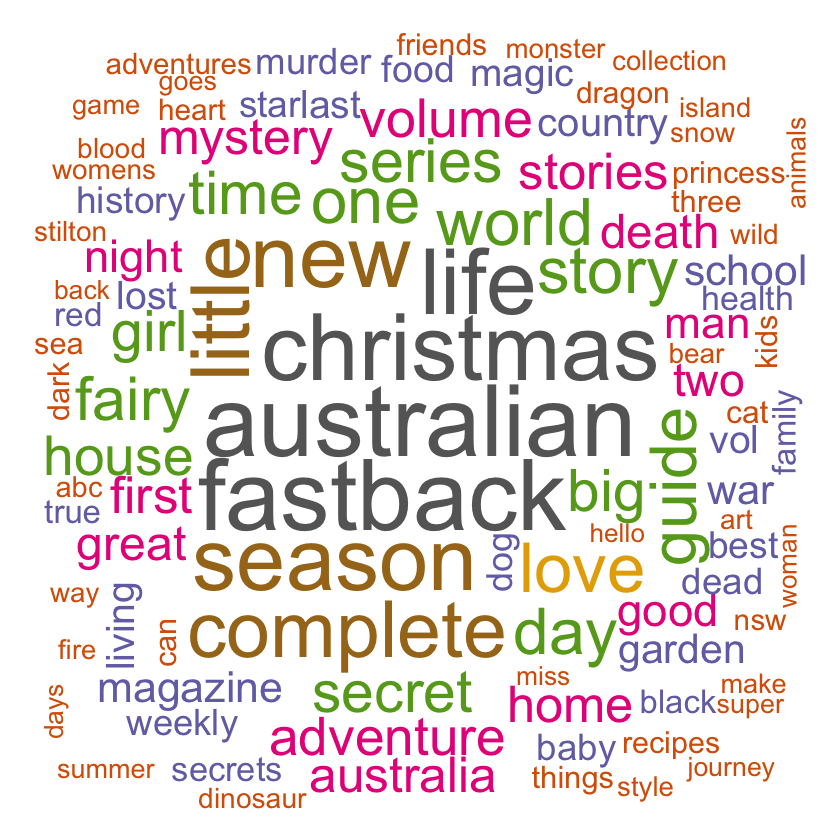

In [5]:
titles_corpus <- sapply(strsplit(as.character(data$Title), "/"), `[`, 1) %>%
  VectorSource() %>%
  Corpus() %>%
  tm_map(content_transformer(tolower)) %>%
  tm_map(removeNumbers) %>%
  tm_map(removeWords, stopwords("english")) %>% 
  tm_map(removeWords, c("dvd", "book", "sound", "recording", "novel")) %>%
  tm_map(removePunctuation) %>% 
  tm_map(stripWhitespace)
wordcloud(titles_corpus, max.words = 100, scale = c(5, 0.5), random.order = FALSE, colors=brewer.pal(8, "Dark2"))

Unsurprisingly, Australia appears to be a popular topic, and Christmas features prominently for the month of December. This concludes our trip to the library for now!